In [72]:
# Python
import numpy as np
import pandas as pd
from prophet import Prophet
from scipy import stats
from prophet.plot import plot_yearly

In [73]:
try:
    df = pd.read_csv('/Users/chris/Documents/UR/SENIOR/FinalSemester/CSC260/Final_Project/pmn_data.csv')
except:
    print("well that didn't work...")

In [96]:
Location_1 = 'TX - Drum Bay'
Location_2 = 'TX — TX - Port O\'Connor Fishing Pier'
Location_3 = 'TX - Jims Pier'
Location_4 = 'TX - Bastrop Bay'
Location_5 = 'TX - Windsurfing Flats Bay Access 2,26.14342'
Location_6 = 'TX - Christmas Bay'
Location_7 = 'TX - Seaside Circle Beach Access 6,26.10269'
Location_8 = 'TX - Pine Gully Pier,29.58933,-94.99033'
Location_9 = 'TX - Isabella Causeway Boardwalk,26.08533'

# We are specifically looking at Diatoms per: https://accscatalog.uaa.alaska.edu/sites/default/files/Phytoplankton%20Guide_May_11_2015_sm.pdf
# Chaetoceros spp. is a specific plankton for it's impacts on fish populations — we would perhaps reccomend not overfishing during periods of bloom
Plankton = ['Coscinodiscus morphotype','Pseudo-nitzschia spp.','Odontella spp.','Bacteriastrum spp.','Chaetoceros spp.']
LocationList = [Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,Location_8,Location_9]

print(df['spec_name'].mode()) # Coscinodiscus morphotype is the modal phytoplankton with 1482 samples
frames = []
prophetList = []
concatenated = []
all =[]
cite_concatenated = []
# cites_x_all_plankton = []

# Plankton types over time
for p in Plankton:  
    frames = []
    for loc in LocationList:
        frame = df.loc[(df['sampl_site'] == loc) &  (df['spec_name'] == p)]
        frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]
        frames.append(frame)
        all.append(frame)
    Texas = pd.concat(frames)
    concatenated.append(Texas)

# Location All Plankton Populations in each location over time 
for loc in LocationList:
    for p in Plankton:
        frame = df.loc[(df['sampl_site'] == loc) &  (df['spec_name'] == p)]
        frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]
        frames.append(frame)
    Texas = pd.concat(frames)
    cite_concatenated.append(Texas)

# Optional if you wanted to blow up your laptop : plot this...
# Each Plankton Type in Each Location over time
# for loc in LocationList:
#     for p in Plankton:
#         frame = df.loc[(df['sampl_site'] == loc) &  (df['spec_name'] == p)]
#         frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]
#         frames.append(frame)
#         Texas = pd.concat(frames)
#         cites_x_all_plankton.append(Texas)


All = pd.concat(all)




0    Coscinodiscus morphotype
Name: spec_name, dtype: object


/var/folders/0s/40sd363j3hv3vw2_9nmxhrrh0000gn/T/ipykernel_20596/2817611927.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]
/var/folders/0s/40sd363j3hv3vw2_9nmxhrrh0000gn/T/ipykernel_20596/2817611927.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]
/var/folders/0s/40sd363j3hv3vw2_9nmxhrrh0000gn/T/ipykernel_20596/2817611927.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]
/var/folders/0s/40sd363j3hv3vw2_9nmxhrrh0000gn/T/ipykernel_20596/2817611927.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]
/var/folders/0s/40sd363j3hv3vw2_9nmxhrrh0000gn/T/ipykernel_20596/2817611927.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame 

In [ ]:
def prophet_maker(dataFrame):
    p = Prophet()
    p.fit(dataFrame)
    return p

for c in concatenated:
    dataFrame = pd.DataFrame(c)
    p = prophet_maker(dataFrame)
    prophetList.append(p)

In [89]:
futures = []
for p in prophetList:
    future = p.make_future_dataframe(periods=365)
    future.tail()
    futures.append(future)

In [90]:
forecasts = []
for i in range(len(prophetList)):
    forecast = prophetList[i].predict(futures[i])
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    forecasts.append(forecast)

In [ ]:
for i in range(len(prophetList)):
    fig1 = prophetList[i].plot_components(forecasts[i])

In [ ]:
for c in concatenated:
    dataFrame = pd.DataFrame(c)
    p = Prophet().fit(dataFrame)
    a = plot_yearly(p)

14:36:48 - cmdstanpy - INFO - Chain [1] start processing
14:36:49 - cmdstanpy - INFO - Chain [1] done processing
14:36:49 - cmdstanpy - INFO - Chain [1] start processing
14:36:49 - cmdstanpy - INFO - Chain [1] done processing
14:36:49 - cmdstanpy - INFO - Chain [1] start processing
14:36:49 - cmdstanpy - INFO - Chain [1] done processing
14:36:49 - cmdstanpy - INFO - Chain [1] start processing
14:36:49 - cmdstanpy - INFO - Chain [1] done processing
14:36:49 - cmdstanpy - INFO - Chain [1] start processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1] start processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1] start processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1] start processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1] start processing
14:36:50 - cmdstanpy - INFO - Chain [1]

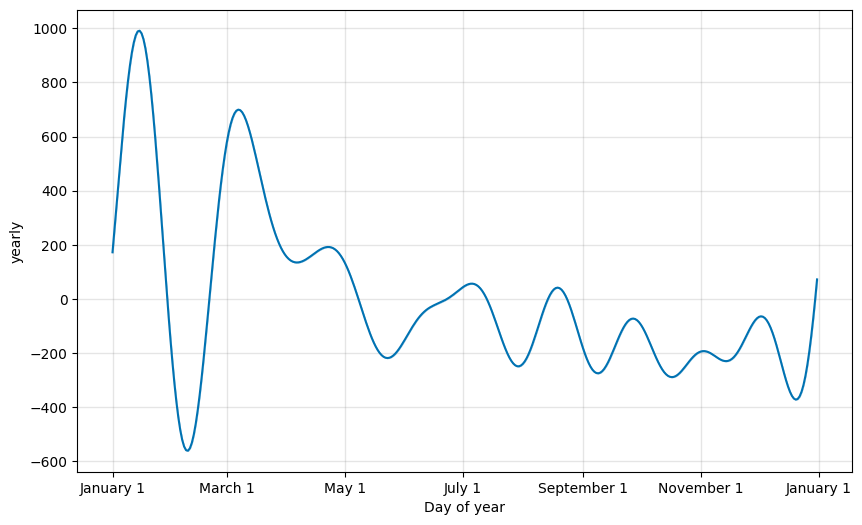

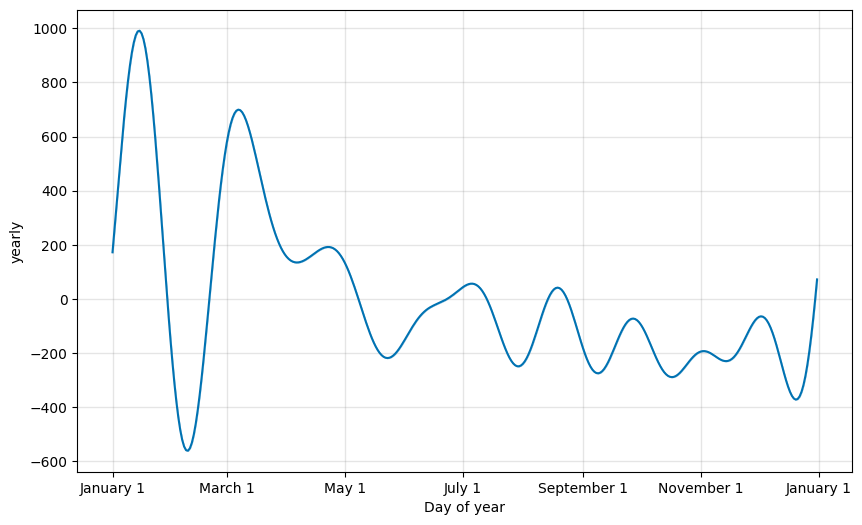

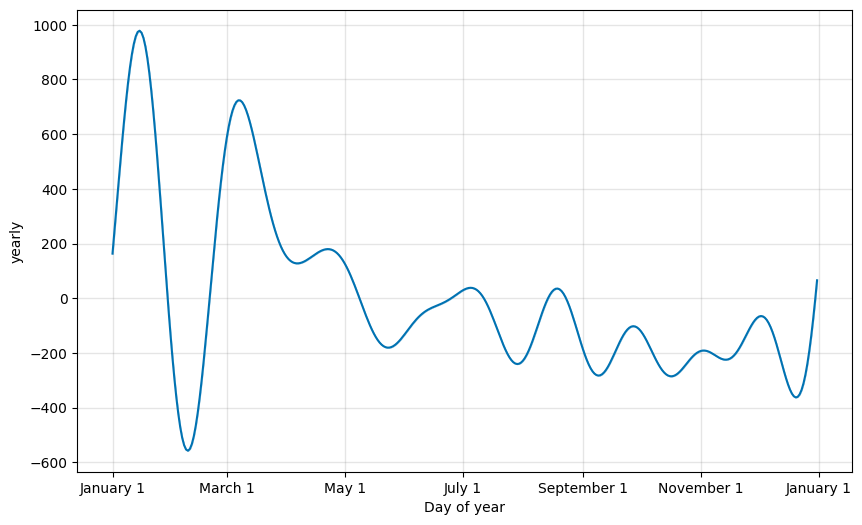

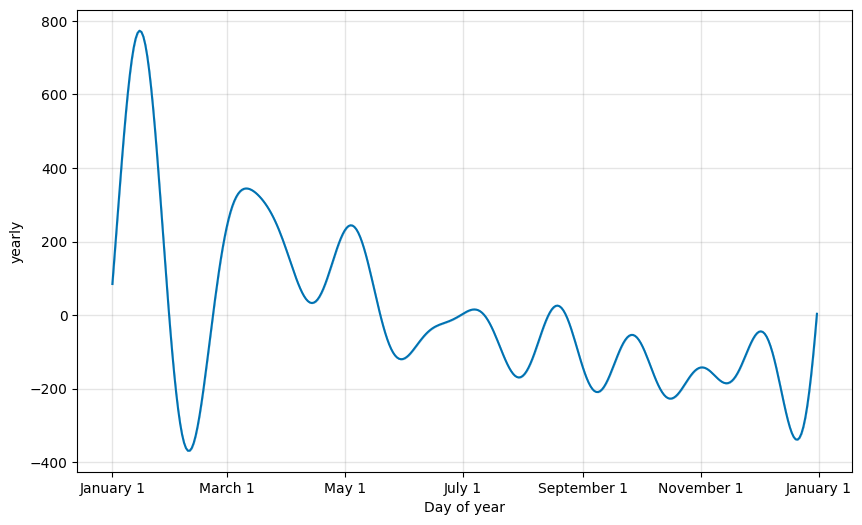

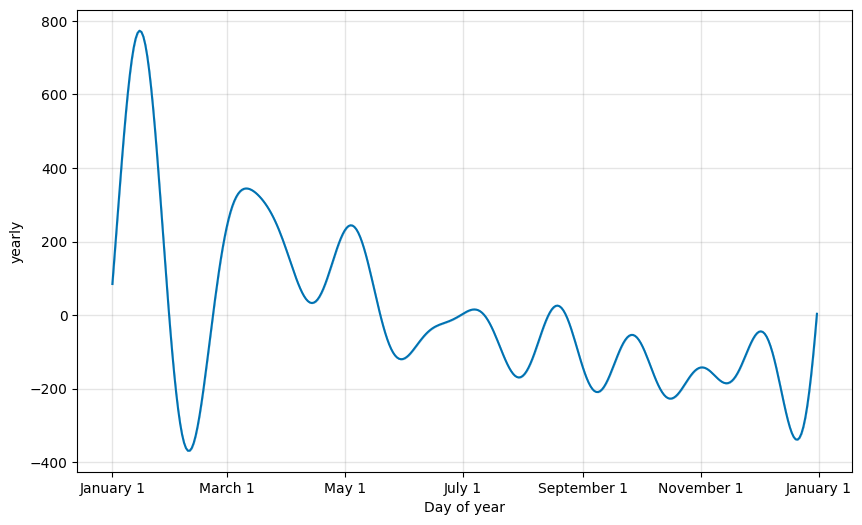

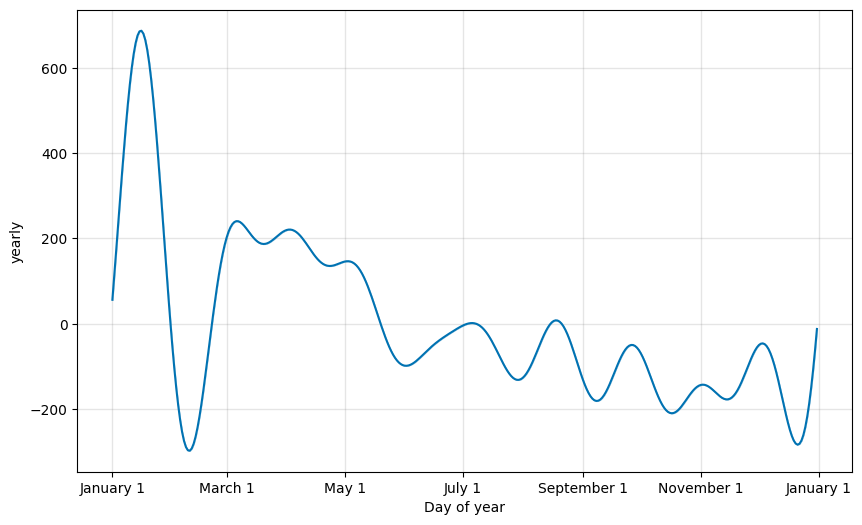

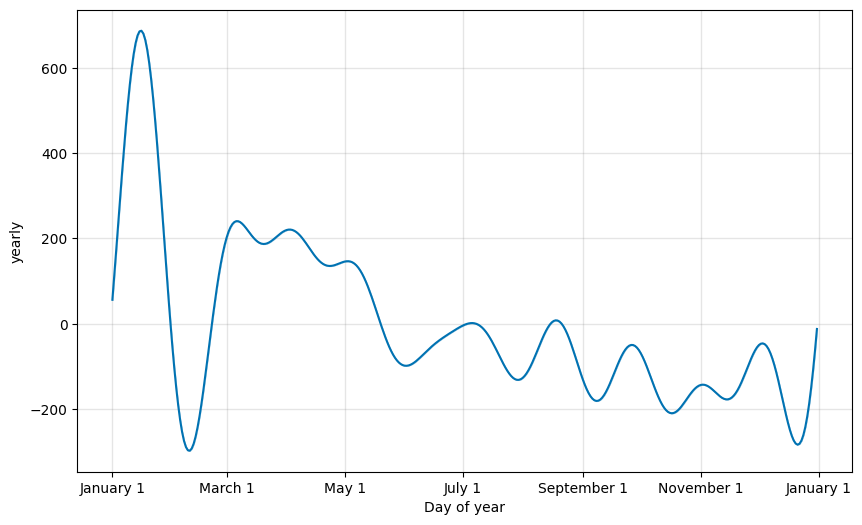

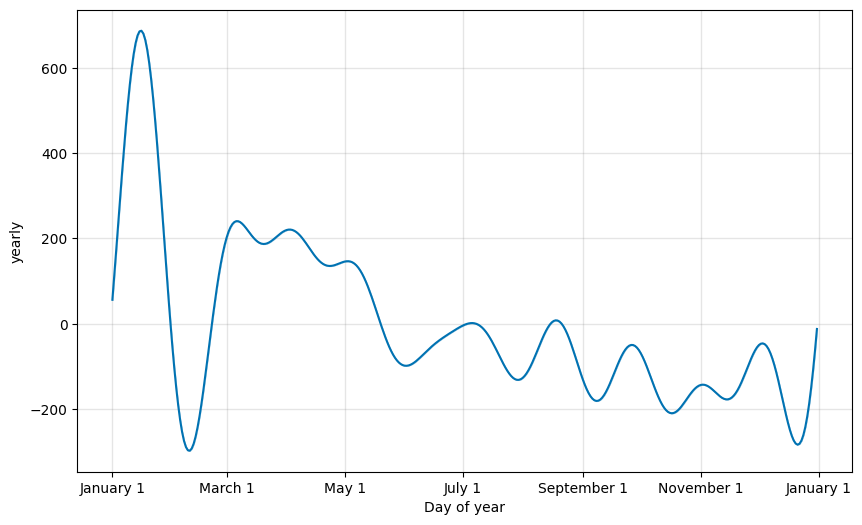

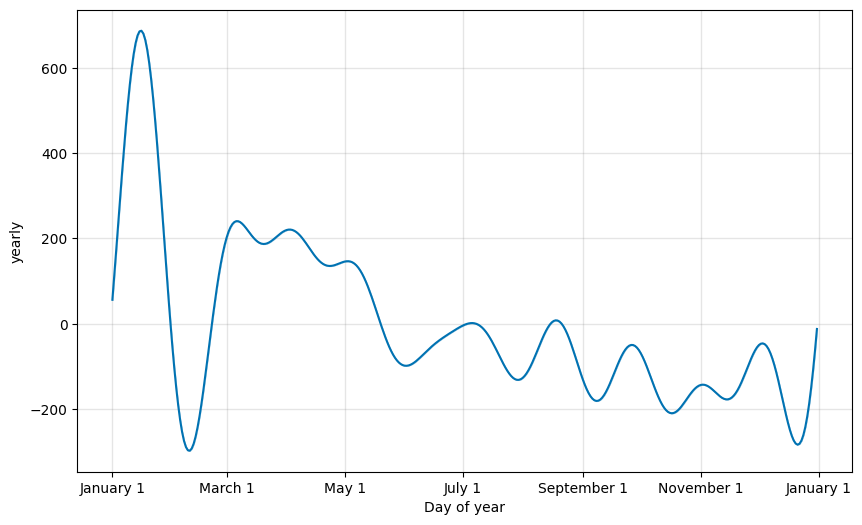

In [98]:
# Plots the plankton blooms over the collection Locations over all plankton
for cite in cite_concatenated:
    dataFrame = pd.DataFrame(cite)
    p = Prophet().fit(dataFrame)
    a = plot_yearly(p)

14:37:43 - cmdstanpy - INFO - Chain [1] start processing
14:37:43 - cmdstanpy - INFO - Chain [1] done processing


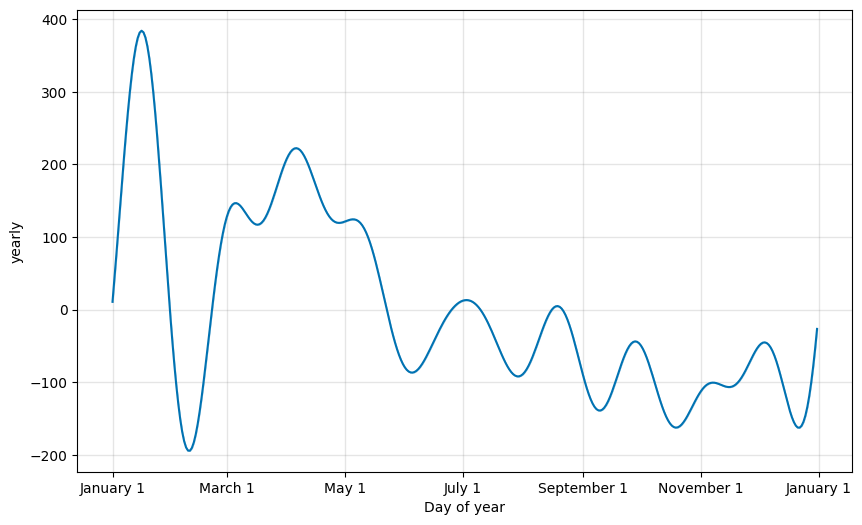

In [99]:
# Plot All Plankton Accorss all sites yearly
dataFrame = pd.DataFrame(All)
p = Prophet()
p.fit(All)
a = plot_yearly(p)